In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0


In [3]:
df_info = pd.DataFrame(columns=['Column', 'Null', 'Dtype', 'Cnt_Unique'])


for i in range(0, len(df.columns)):
    df_info.loc[i] = [
        df.columns[i],
        df[df.columns[i]].isnull().sum(),
        df[df.columns[i]].dtypes,
        df[df.columns[i]].nunique()
    ]

df_info

,Column,Null,Dtype,Cnt_Unique
0,ID,0,int64,2240
1,Year_Birth,0,int64,59
2,Education,0,object,5
3,Marital_Status,0,object,8
4,Income,24,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Dt_Customer,0,object,663
8,Recency,0,int64,100
9,MntWines,0,int64,776


Customer's Info

    ID
    Year_Birth
    Education
    Marital_Status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if customer complained in the last 2 years, 0 otherwise
    
Products
    
    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    
Place

    NumWebPurchases: Number of purchases made through the company’s web site
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitMonth: Number of visits to company’s web site in the last month

#### Data Cleaning 

Year Birth

In [4]:
#add new column for age

getdate = date.today() #current year
df['Age'] = getdate.year - df['Year_Birth']

Education

In [5]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
#Make 3 categories of education, graduation, post graduation and basic

df.loc[(df['Education'] == 'PhD') | (df['Education'] == 'Master') | 
       (df['Education'] == '2n Cycle'), 'Education'] = 'Post Graduation'

Marital Status

In [7]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [8]:
#Just make 2 categories married and alone

df.loc[(df['Marital_Status'] == 'Together'), 'Marital_Status'] = 'Married'
df.loc[(df['Marital_Status'] != 'Married'), 'Marital_Status'] = 'Alone'

Kids and Teen

In [9]:
#add new column to see number of children in the house and children flag

df['Children'] = df['Kidhome'] + df['Teenhome']
df['IsParent'] = np.where(df['Children'] > 0, 1, 0)

Dt_Customer

In [10]:
#change dtype of Dt_Customer field

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
df['Dt_Customer'].dtypes

dtype('<M8[ns]')

Income

In [12]:
#see shape of data before dropna
df.shape

(2240, 32)

In [13]:
#drop null value from income

df.dropna(inplace = True)
df.shape

(2216, 32)

Make new column count purchase all product in the last 2 years

In [14]:
df['CntMnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
+ df['MntSweetProducts'] + df['MntGoldProds']

0       176
1         7
2        63
3         8
4        42
       ... 
2235    365
2236      8
2237     36
2238     91
2239     22
Length: 2216, dtype: int64

In [15]:
#make new column to see is there any purchase in the last 2 years

df['IsPurchase'] = np.where(df['CntMnt'] > 0, 1, 0)

In [16]:
df_info = pd.DataFrame(columns=['Column', 'Null', 'Dtype', 'Cnt_Unique'])


for i in range(0, len(df.columns)):
    df_info.loc[i] = [
        df.columns[i],
        df[df.columns[i]].isnull().sum(),
        df[df.columns[i]].dtypes,
        df[df.columns[i]].nunique()
    ]

print('Count rows: {}'.format(df.shape[0]))
df_info

Count rows: 2216


,Column,Null,Dtype,Cnt_Unique
0,ID,0,int64,2216
1,Year_Birth,0,int64,59
2,Education,0,object,3
3,Marital_Status,0,object,2
4,Income,0,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Dt_Customer,0,datetime64[ns],662
8,Recency,0,int64,100
9,MntWines,0,int64,776


### EDA 

<function matplotlib.pyplot.show(close=None, block=None)>

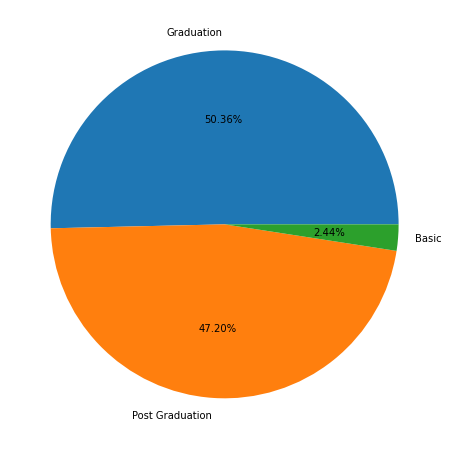

In [17]:
plt.figure(figsize=(12,8))
plt.pie(x = df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct = '%1.2f%%', wedgeprops = {'linewidth': 3})
plt.show

Text(0.5, 1.0, 'Married')

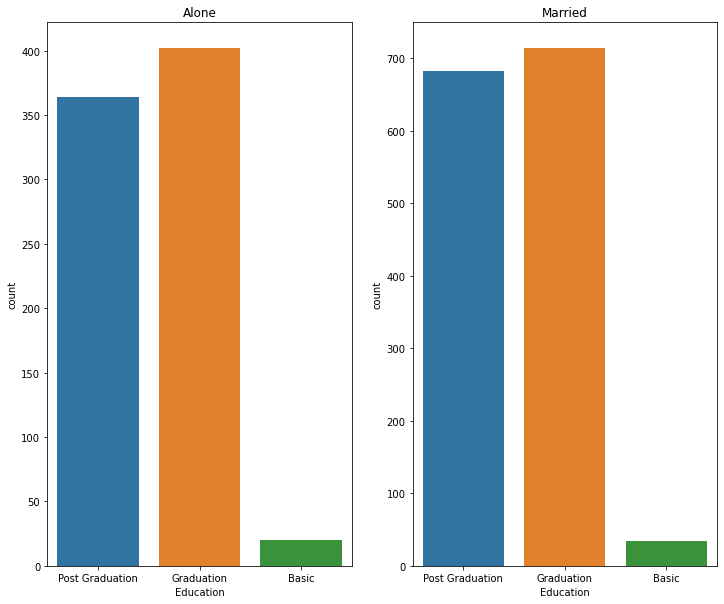

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,10))

sns.countplot(ax=axes[0], x='Education', data=df[df['Marital_Status']=='Alone'], order=['Post Graduation', 'Graduation', 'Basic'])
axes[0].set_title('Alone')

sns.countplot(ax=axes[1], x='Education', data=df[df['Marital_Status']=='Married'], order=['Post Graduation', 'Graduation', 'Basic'])
axes[1].set_title('Married')

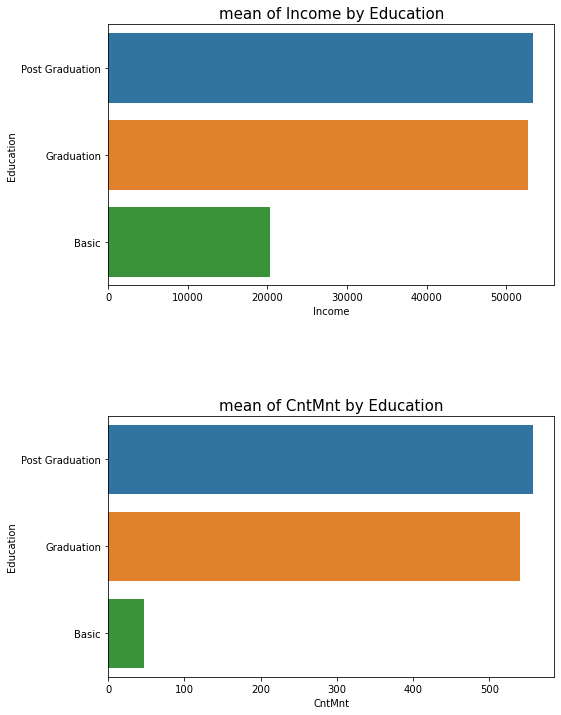

In [19]:
to_barplot = ['Income', 'CntMnt']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,12))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = df, y = 'Education', x = col, ax = ax, ci = None, order=['Post Graduation', 'Graduation', 'Basic'])
    ax.set_title(f'mean of {col} by Education', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
        
plt.show()

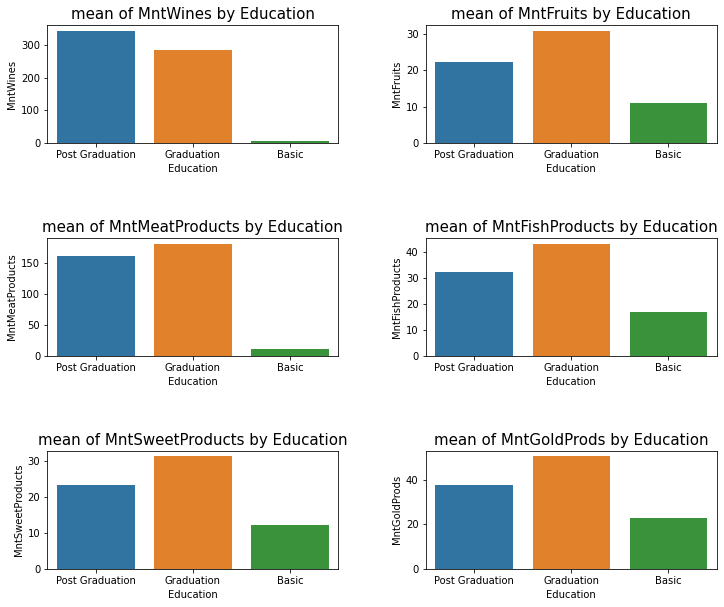

In [20]:
to_barplot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = df, x = 'Education', y = col, ax = ax, ci = None, order=['Post Graduation', 'Graduation', 'Basic'])
    ax.set_title(f'mean of {col} by Education', fontsize = 15)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
        
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

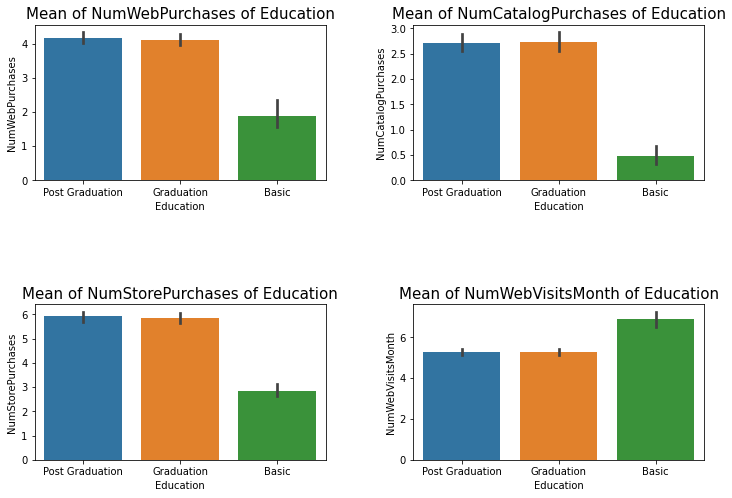

In [21]:
to_barplot = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data=df, x='Education', y=col, ax=ax, order=['Post Graduation', 'Graduation', 'Basic'])
    ax.set_title(f'Mean of {col} of Education', fontsize=15)
    plt.subplots_adjust(wspace=0.3, hspace=0.8)
#     axes[-1].axis('off')
    
plt.show

[Text(0.5, 1.0, 'Num Purchases by Education')]

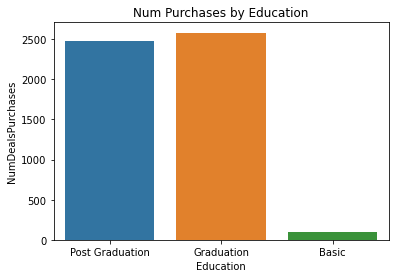

In [22]:
num_deals = pd.DataFrame(df.groupby('Education')['NumDealsPurchases'].sum())
num_deals = num_deals.reset_index()

sns.barplot(x='Education', y='NumDealsPurchases', data=num_deals, order=['Post Graduation', 'Graduation', 'Basic']).set(title='Num Purchases by Education')

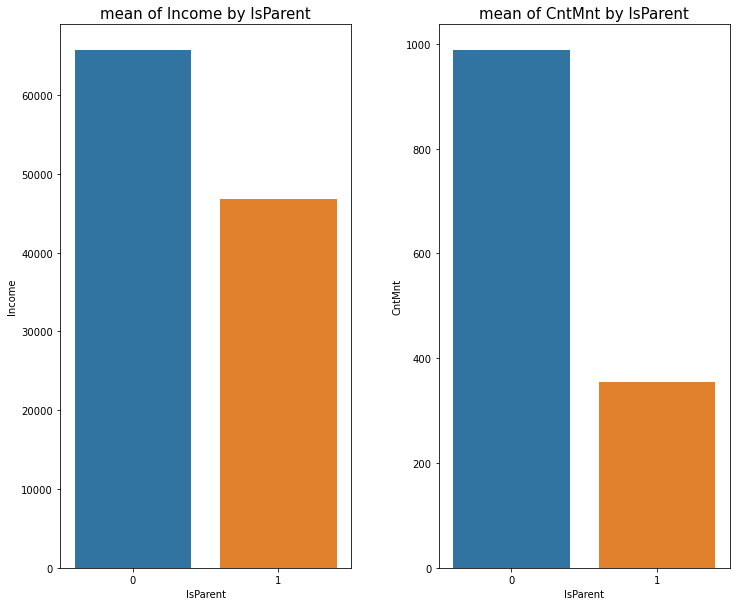

In [23]:
to_barplot = ['Income', 'CntMnt']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = df, x = 'IsParent', y = col, ax = ax, ci = None)
    ax.set_title(f'mean of {col} by IsParent', fontsize = 15)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
        
plt.show()

<AxesSubplot:xlabel='IsParent', ylabel='count'>

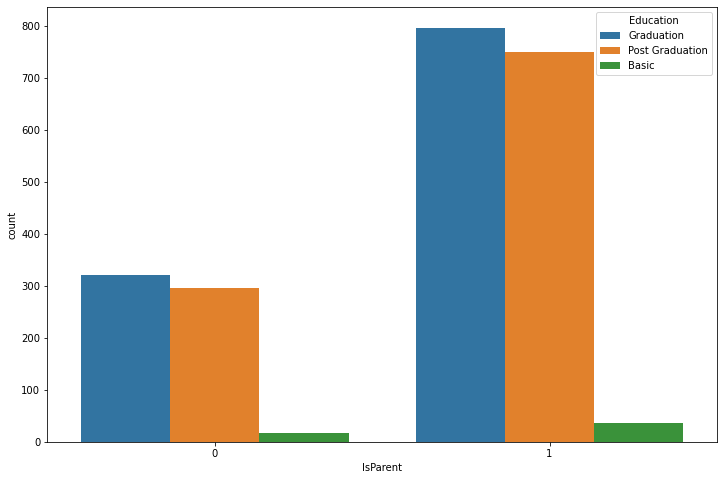

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='IsParent', hue='Education')

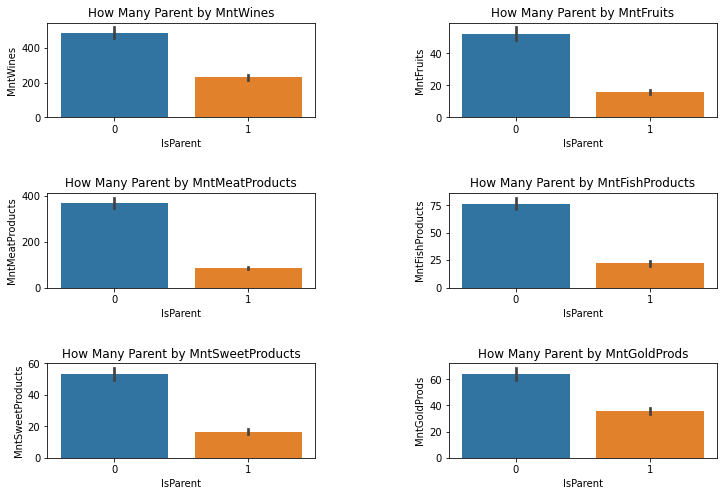

In [25]:
to_barplot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(3, 2, figsize=(12,8))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data=df , x='IsParent', y=col, ax=ax)
    ax.set_title(f'How Many Parent by {col}')
    plt.subplots_adjust(hspace=0.8, wspace=0.5)
    
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

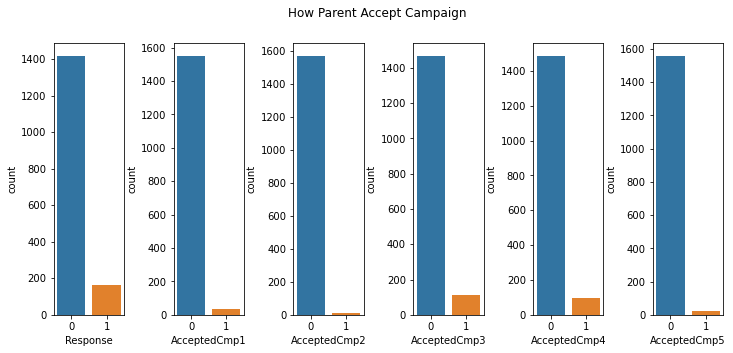

In [26]:
#Compare how parent accept campaign
fig, axes = plt.subplots(1, 6, figsize=(12,5))
fig.suptitle('How Parent Accept Campaign')

sns.countplot(ax=axes[0] , x='Response', data=df[df['IsParent']==1])
sns.countplot(ax=axes[1] , x='AcceptedCmp1', data=df[df['IsParent']==1])
sns.countplot(ax=axes[2] , x='AcceptedCmp2', data=df[df['IsParent']==1])
sns.countplot(ax=axes[3] , x='AcceptedCmp3', data=df[df['IsParent']==1])
sns.countplot(ax=axes[4] , x='AcceptedCmp4', data=df[df['IsParent']==1])
sns.countplot(ax=axes[5] , x='AcceptedCmp5', data=df[df['IsParent']==1])

plt.subplots_adjust(hspace = 0.8, wspace = 0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

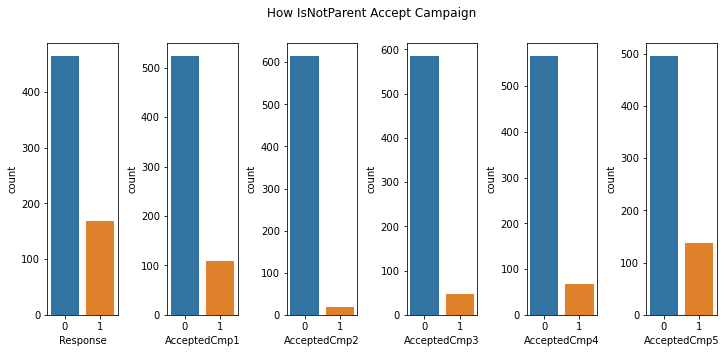

In [27]:
#Compare how not parent accept campaign
fig, axes = plt.subplots(1, 6, figsize=(12,5))
fig.suptitle('How IsNotParent Accept Campaign')

sns.countplot(ax=axes[0] , x='Response', data=df[df['IsParent']==0])
sns.countplot(ax=axes[1] , x='AcceptedCmp1', data=df[df['IsParent']==0])
sns.countplot(ax=axes[2] , x='AcceptedCmp2', data=df[df['IsParent']==0])
sns.countplot(ax=axes[3] , x='AcceptedCmp3', data=df[df['IsParent']==0])
sns.countplot(ax=axes[4] , x='AcceptedCmp4', data=df[df['IsParent']==0])
sns.countplot(ax=axes[5] , x='AcceptedCmp5', data=df[df['IsParent']==0])

plt.subplots_adjust(hspace = 0.8, wspace = 0.7)
plt.show

[Text(0.5, 1.0, 'Num Purchases by IsParent')]

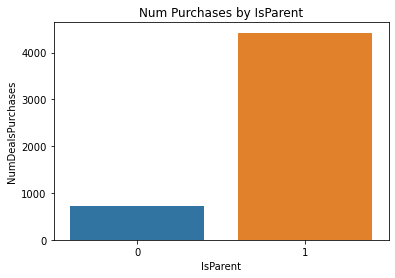

In [28]:
num_deals_par = pd.DataFrame(df.groupby('IsParent')['NumDealsPurchases'].sum())
num_deals_par = num_deals_par.reset_index()

sns.barplot(x='IsParent', y='NumDealsPurchases', data=num_deals_par).set(title='Num Purchases by IsParent')

Text(0.5, 1.0, 'Parent=1')

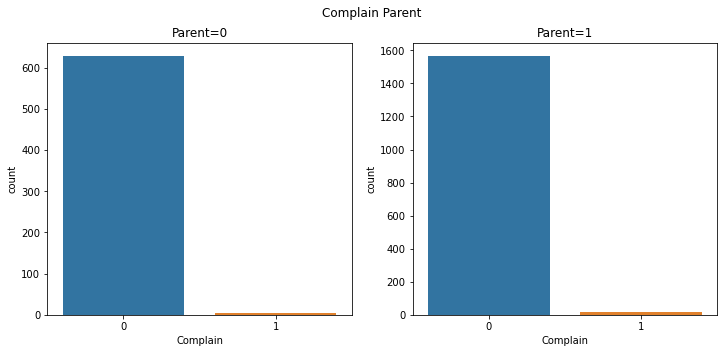

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Complain Parent')

sns.countplot(ax=axes[0] , x='Complain', data=df[df['IsParent']==0])
axes[0].set_title('Parent=0')

sns.countplot(ax=axes[1] , x='Complain', data=df[df['IsParent']==1])
axes[1].set_title('Parent=1')